## Repaso teórico: Algoritmo K-Means

###  ¿Qué es K-Means?

El **K-Means** es un algoritmo de **aprendizaje no supervisado** utilizado para **agrupar observaciones** en *k* grupos o *clusters*, de tal forma que:

- Los puntos dentro de un mismo cluster sean **similares entre sí**.
- Los puntos de diferentes clusters sean **lo más distintos posible**.

Matemáticamente, K-Means busca **minimizar la suma de distancias cuadradas** entre los puntos y su centroide correspondiente.

$$
J = \sum_{i=1}^{k} \sum_{x_j \in C_i} ||x_j - \mu_i||^2
$$

donde:
- $ k $: número de clusters,
- $ C_i $: conjunto de puntos pertenecientes al cluster *i*,
- $ \mu_i $: centroide del cluster *i*,
- $ x_j $: cada punto de datos.

---

###  Funcionamiento paso a paso del algoritmo

1. **Inicialización**  
   Se eligen *k* puntos iniciales (centroides). Estos pueden seleccionarse al azar o mediante técnicas como *k-means++* para mejorar la estabilidad.

2. **Asignación de puntos**  
   Cada observación se asigna al **centroide más cercano** según la distancia euclídea:
   $$
   d(x, \mu_i) = \sqrt{\sum_{p=1}^{n} (x_p - \mu_{ip})^2}
   $$

3. **Actualización de centroides**  
   Cada centroide se recalcula como la **media** de todos los puntos asignados a su cluster:
  $$
   \mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
   $$

4. **Convergencia**  
   El proceso de asignar y actualizar se repite hasta que los centroides cambian menos que un umbral o el número máximo de iteraciones es alcanzado.

---

###  Criterios para elegir el número óptimo de *k*

- **Método del codo (Elbow Method)**  
  Se grafica la **inercia (SSE)** frente a *k* y se elige el punto donde la reducción adicional es marginal.

- **Coeficiente de Silhouette**  
  Mide qué tan similar es un punto a su propio cluster comparado con otros clusters.  
  $$
  s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
  $$
  donde:
  - $ a(i) $: distancia promedio del punto *i* a los otros puntos del mismo cluster.
  - $ b(i) $: distancia promedio del punto *i* al cluster más cercano diferente al suyo.  
  - $ s(i) $ toma valores entre -1 y 1 (mayor es mejor).

---

###  Relación entre PCA y K-Means

- PCA **reduce dimensionalidad** manteniendo la variabilidad más relevante.
- K-Means se aplica sobre las **componentes principales (PC1, PC2, …)**, donde:
  - Se eliminan correlaciones entre variables.
  - Se mejora la eficiencia del agrupamiento.
  - Se facilita la visualización de los clusters.

**Interpretación típica:**
- Cada punto representa un individuo proyectado en el espacio de componentes.
- Los colores indican a qué cluster pertenece.
- Las medias de las variables originales por cluster permiten entender **qué define a cada grupo**.

---

###  Resultados clave que deben reportarse

| Resultado | Descripción |
|------------|-------------|
| **Número de clusters (k)** | Valor elegido según codo o silhouette. |
| **Porcentaje por cluster** | Cuántas observaciones caen en cada grupo. |
| **Centroides / Medias por variable** | Perfil característico de cada cluster. |
| **Gráficos** | Dispersión PC1–PC2 y barras comparativas de variables. |

---

> **Resumen:**  
> K-Means es un método simple pero poderoso para descubrir estructuras ocultas en los datos.  
> Cuando se combina con PCA, permite agrupar observaciones en función de patrones latentes, reduciendo ruido y mejorando la interpretabilidad visual y estadística.


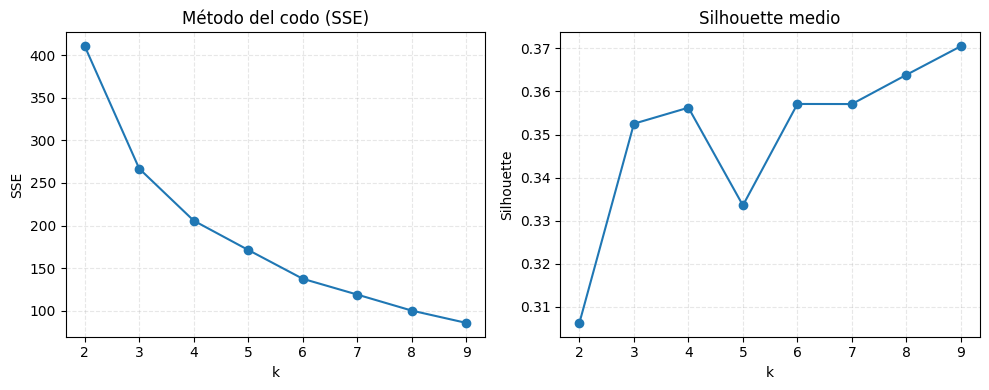

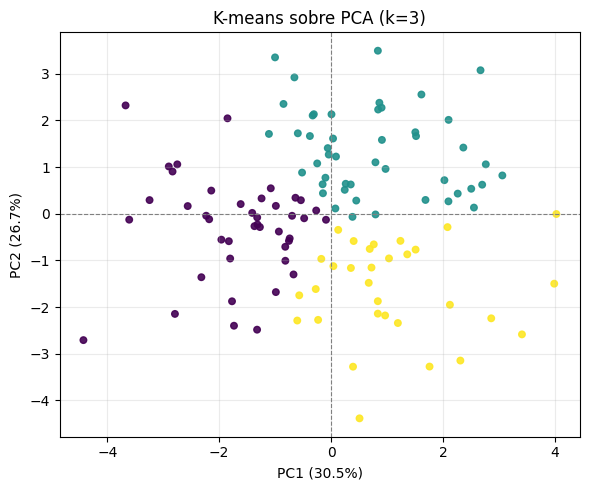

Tamaño de cada cluster (%):
0    35.00
1    39.17
2    25.83 

Promedios por variable en cada cluster:

         Hemoglobina_g_dL  Hematocrito_%  VCM_fL  Glucosa_mg_dL  \
Cluster                                                           
0                   13.74          11.00    6.80          82.95   
1                   13.86          11.05    6.85          91.23   
2                   14.97          12.12    7.39         100.89   

         Colesterol_mg_dL  Trigliceridos_mg_dL  PCR_mg_L  IL6_pg_mL  \
Cluster                                                               
0                   57.22                50.77      2.17       1.71   
1                   64.58                53.60      3.29       2.67   
2                   73.19                65.45      2.47       1.99   

         TNFalpha_pg_mL  
Cluster                  
0                  0.80  
1                  1.38  
2                  1.04  


<Figure size 1000x500 with 0 Axes>

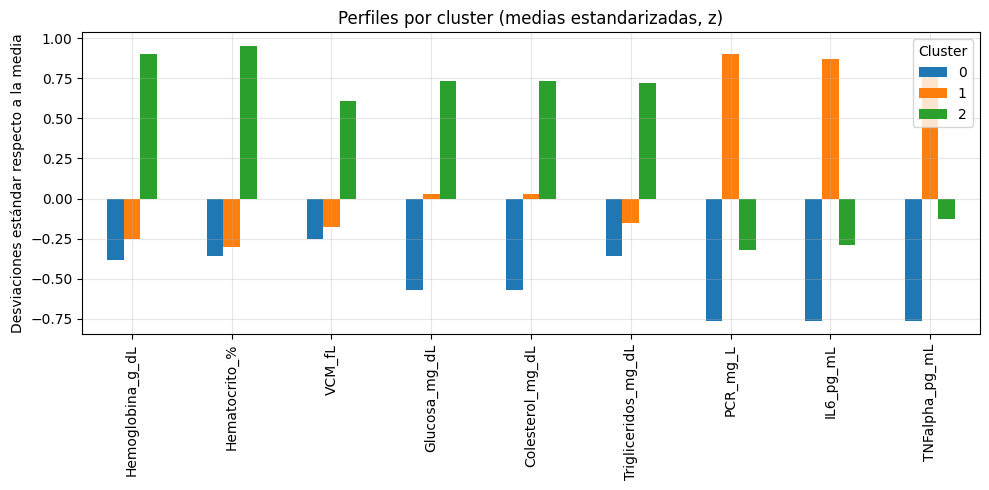

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ---------- 0) Parámetros ----------
dataset_path = "Datos_PCA_Biomedico.csv"   
k_elegido = 3                                            # <- define k tras ver codo/silhouette

# ---------- 1) Cargar y estandarizar ----------
df = pd.read_csv(dataset_path)
X = df.values
Xz = StandardScaler().fit_transform(X)

# ---------- 2) PCA ----------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(Xz)
var_exp = pca.explained_variance_ratio_ * 100  # %

# ---------- 3) Elección de k: Codo + Silhouette ----------
ks = range(2, 10)
sse, sil = [], []
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_pca)
    sse.append(km.inertia_)
    sil.append(silhouette_score(X_pca, km.labels_))

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(list(ks), sse, marker='o')
ax[0].set_title("Método del codo (SSE)"); ax[0].set_xlabel("k"); ax[0].set_ylabel("SSE"); ax[0].grid(alpha=.3, ls='--')
ax[1].plot(list(ks), sil, marker='o')
ax[1].set_title("Silhouette medio"); ax[1].set_xlabel("k"); ax[1].set_ylabel("Silhouette"); ax[1].grid(alpha=.3, ls='--')
plt.tight_layout(); plt.show()

# ---------- 4) Ajustar K-means con k elegido ----------
km = KMeans(n_clusters=k_elegido, n_init=10, random_state=42).fit(X_pca)
labels = km.labels_

# ---------- 5) Dispersión PC1–PC2 coloreada por cluster ----------
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=22, alpha=0.9)
plt.axhline(0, color='gray', ls='--', lw=0.8); plt.axvline(0, color='gray', ls='--', lw=0.8)
plt.xlabel(f"PC1 ({var_exp[0]:.1f}%)"); plt.ylabel(f"PC2 ({var_exp[1]:.1f}%)")
plt.title(f"K-means sobre PCA (k={k_elegido})"); plt.grid(alpha=.25)
plt.tight_layout(); plt.show()

# ---------- 6) Resumen interpretativo ----------
# 6.1 Porcentaje por cluster
tam = (pd.Series(labels).value_counts(normalize=True)*100).sort_index().round(2)
print("Tamaño de cada cluster (%):")
print(tam.to_string(), "\n")

# 6.2 Perfiles por cluster (medias en escala original)
df_perfil = df.copy(); df_perfil["Cluster"] = labels
perfil = df_perfil.groupby("Cluster").mean().round(2)
print("Promedios por variable en cada cluster:\n")
print(perfil)

# 6.3 Perfiles estandarizados (z) para comparar variables en una misma escala
mu, sigma = df.mean(), df.std(ddof=0)
perfil_z = ((perfil - mu) / sigma).round(2)

# Gráfico de barras (perfiles z) para facilitar interpretación comparativa
plt.figure(figsize=(10, 5))
perfil_z.T.plot(kind='bar', figsize=(10, 5))
plt.title("Perfiles por cluster (medias estandarizadas, z)")
plt.ylabel("Desviaciones estándar respecto a la media")
plt.grid(alpha=.3); plt.tight_layout(); plt.show()

# ---------- 7) Guardar resultados (opcional) ----------
out = df.copy(); out["Cluster"] = labels
# out.to_csv("Resultados_PCA_KMeans.csv", index=False)
